# a rough accessible calligraphy alphabet

my two calligraphy defaults are <q>fuck</q> and _the alphabet_.
i'm very curious how i can make this accessible to blind and low vision people.
for a long time, i've thought about using the `img + map > area` pattern to create a tactile experience on mobile
screen readers.

[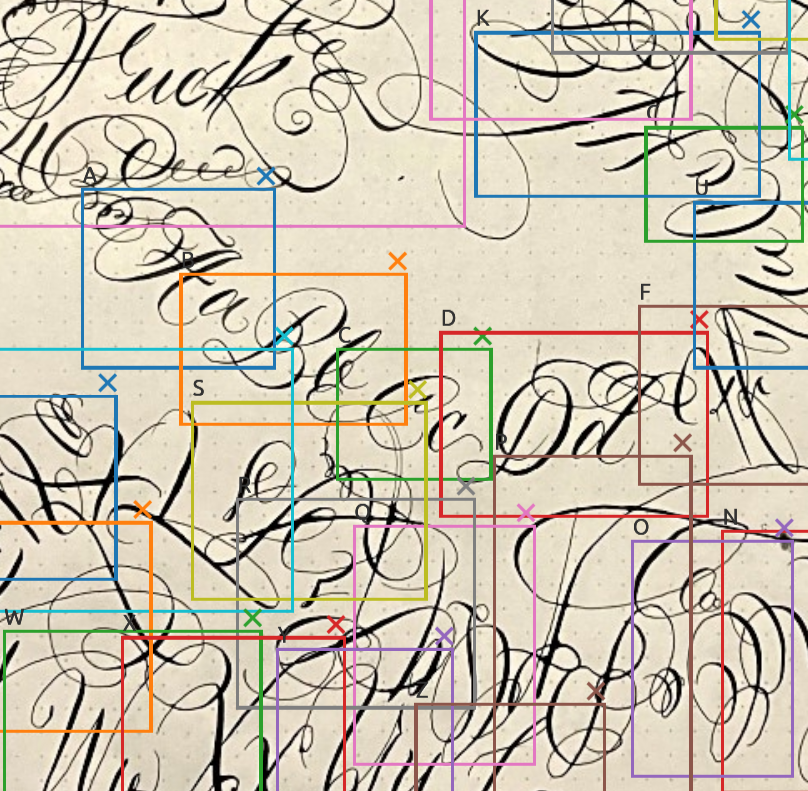](#demo)

In [1]:
%%
## using `jupyter_bbox_widget` to annotate calligraphy

@garaleth shared a widget specifically for annotating images in jupyterlab available with `pip install jupyter_bbox_widget`.
it worked perfectly for annotating the letters in this non-gridded, wandering alphabet.

    AREAS:\
a file we save our annotations to, if we don't save them then they are lost when the kernel restarts.\

    = Path("abcdfuck.json")
    (widget := __import__("jupyter_bbox_widget").BBoxWidget(
        image="abcefuck.jpg", classes=list(string.ascii_uppercase) + "fuck".split(), 
        bboxes=pandas.read_json(AREAS).to_dict(orient="records")));

using jupyter_bbox_widget to annotate calligraphy 
 @garaleth shared a widget specifically for annotating images in jupyterlab available with pip install jupyter_bbox_widget .
it worked perfectly for annotating the letters in this non-gridded, wandering alphabet. 
 AREAS:\
 
 a file we save our annotations to, if we don't save them then they are lost when the kernel restarts.\ 
 = Path("abcdfuck.json")
(widget := __import__("jupyter_bbox_widget").BBoxWidget(
 image="abcefuck.jpg", classes=list(string.ascii_uppercase) + "fuck".split(), 
 bboxes=pandas.read_json(AREAS).to_dict(orient="records")));

In [2]:
%%
## extracting features for making a `map`

https://developer.mozilla.org/en-US/docs/Web/HTML/Element/map

    areas = DataFrame(widget.bboxes)
    areas = areas.assign(x2=areas.x + areas.width, y2 = areas.y + areas.height)
composite the coords attribute required by the spec

    areas = areas.assign(coords=areas.x.astype(str) + "," + areas.y.astype(str) + "," +  areas.x2.astype(str) + "," + areas.y2.astype(str))
create the area tags from the columns

    areas = areas.assign(area=areas.apply(lambda s: 
```html        
<area shape=rect coords="{coords}" alt="{label}" />
``` 
    .format(**s), axis=1))

extracting features for making a map 
 https://developer.mozilla.org/en-US/docs/Web/HTML/Element/map 
 areas = DataFrame(widget.bboxes)
areas = areas.assign(x2=areas.x + areas.width, y2 = areas.y + areas.height)
 
 composite the coords attribute required by the spec 
 areas = areas.assign(coords=areas.x.astype(str) + "," + areas.y.astype(str) + "," + areas.x2.astype(str) + "," + areas.y2.astype(str))
 
 create the area tags from the columns 
 areas = areas.assign(area=areas.apply(lambda s: 
 
 < area shape = rect coords = "{coords}" alt = "{label}" />
 
 
 .format(**s), axis=1))

'<style>\n:focus-visible, area:focus {\n    outline: 3px solid black;\n    box-shadow: 0 0 0 6px white;\n}\n</style>\n<map name=abcdfuck><area shape=rect coords="57,24,416,206" alt="fuck" />\n<area shape=rect coords="187,184,302,291" alt="A" />\n<area shape=rect coords="246,235,381,325" alt="B" />\n<area shape=rect coords="340,280,432,358" alt="C" />\n<area shape=rect coords="402,270,562,380" alt="D" />\n<area shape=rect coords="521,254,641,361" alt="F" />\n<area shape=rect coords="554,192,650,291" alt="U" />\n<area shape=rect coords="525,147,619,215" alt="C" />\n<area shape=rect coords="423,90,593,188" alt="K" />\n<area shape=rect coords="396,32,552,142" alt="G" />\n<area shape=rect coords="469,3,610,102" alt="H" />\n<area shape=rect coords="567,2,709,94" alt="I" />\n<area shape=rect coords="611,12,794,166" alt="J" />\n<area shape=rect coords="626,118,800,244" alt="K" />\n<area shape=rect coords="667,206,798,334" alt="L" />\n<area shape=rect coords="640,249,799,434" alt="M" />\n<area shape=rect coords="571,389,718,546" alt="N" />\n<area shape=rect coords="517,395,613,536" alt="O" />\n<area shape=rect coords="434,344,552,557" alt="P" />\n<area shape=rect coords="350,386,458,529" alt="Q" />\n<area shape=rect coords="280,370,422,495" alt="R" />\n<area shape=rect coords="253,312,393,430" alt="S" />\n<area shape=rect coords="124,280,313,437" alt="T" />\n<area shape=rect coords="79,308,207,418" alt="U" />\n<area shape=rect coords="66,384,228,509" alt="V" />\n<area shape=rect coords="140,449,294,576" alt="W" />\n<area shape=rect coords="211,453,344,591" alt="X" />\n<area shape=rect coords="304,460,409,597" alt="Y" />\n<area shape=rect coords="387,493,500,601" alt="Z" />\n</map>\n<img id=demo usemap=#abcdfuck src="data:image/jpg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/4QBqRXhpZgAASUkqAAgAAAADABIBAwABAAAAAwAAADEBAgARAAAAMgAAAGmHBAABAAAARAAAAAAAAABTaG90d2VsbCAwLjMwLjE0AAACAAKgCQABAAAAIAMAAAOgCQABAAAAWQIAAAAAAAD/4Qn0aHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA0LjQuMC1FeGl2MiI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIiB4bWxuczp0aWZmPSJodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyIgZXhpZjpQaXhlbFhEaW1lbnNpb249IjgwMCIgZXhpZjpQaXhlbFlEaW1lbnNpb249IjYwMSIgdGlmZjpJbWFnZVdpZHRoPSI4MDAiIHRpZmY6SW1hZ2VIZWlnaHQ9IjYwMSIgdGlmZjpPcmllbnRhdGlvbj0iMyIvPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgI
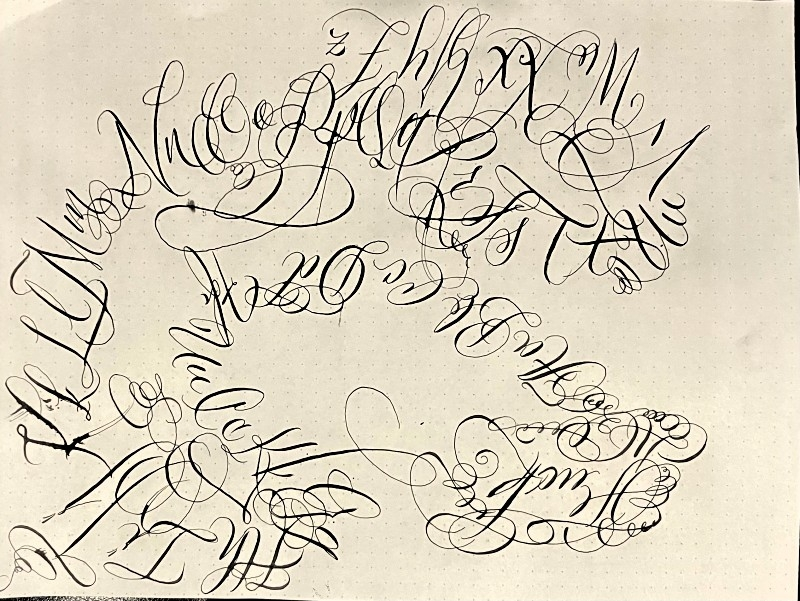

all together now 
 display((
 
 < style >
: focus-visible , area : focus {
 outline : 3 px solid black ;
 box-shadow : 0 0 0 6 px white ;
}
</ style >
< map name = abcdfuck >{{areas.area | join("")}}</ map >
< img id = demo usemap = #abcdfuck src = "data:image/jpg;base64,{{base64.b64encode(Path(" abcefuck . jpg "). read_bytes ()). decode ()}}" />
 
 
 ).render())

In [3]:
%%
## all together now

{% raw %}

    display((
```html
<style>
:focus-visible, area:focus {
    outline: 3px solid black;
    box-shadow: 0 0 0 6px white;
}
</style>
<map name=abcdfuck>{{areas.area | join("")}}</map>
<img id=demo usemap=#abcdfuck src="data:image/jpg;base64,{{base64.b64encode(Path("abcefuck.jpg").read_bytes()).decode()}}" />
```

    ).render())

{% endraw %}